In [1]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import tqdm

In [2]:
def experiment(n, k):
    base_set = list(range(n))
    elements = set()
    ys = []
    for _ in range(k):
        r = random.choice(base_set)
        elements.add(r)
        ys.append(len(elements))
    return ys

Text(0.5, 1.0, 'Unique element count in random sampling from 100 elements')

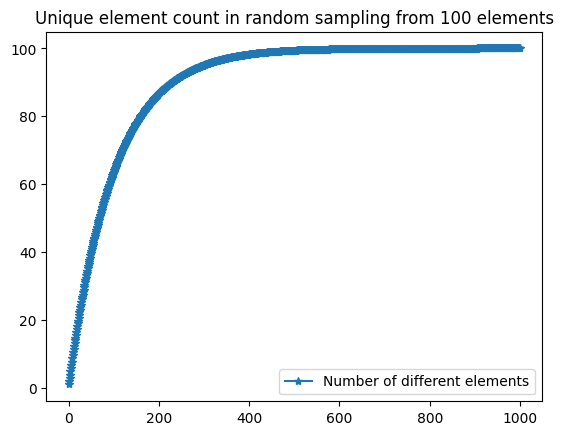

In [3]:
epoch = 1000
n, k = 100, 1000

xs = list(range(k))

collector = np.zeros(k)
for _ in range(epoch):
    ys = np.array(experiment(n, k))
    collector += ys
collector /= epoch


plt.plot(xs, collector, "*-", label="Number of different elements")
plt.legend()
plt.title(f"Unique element count in random sampling from {100} elements")
#plt.xlim(300,700)

In [38]:
def experiment_with_weight_update(n, k, update_const=1):
    base_set = list(range(n))
    have_seen = set()
    ys = []
    for _ in range(k):
        r = random.choice(base_set)
        count_of_r = base_set.count(r)
        #print(f"Found {r} {count_of_r} times, size of base set is {len(base_set)}")
        have_seen.add(r)
        for _ in range(int(math.sqrt(count_of_r))):
            base_set.append(r)        
        ys.append(len(have_seen))
    return ys

def run_experiment_with_updates(
    epochs: int,
    base_set_size: int,
    nr_of_elements_pulled: int,
    update_const: int=1,
):
    collector_with_updates = np.zeros(nr_of_elements_pulled)
    for _ in tqdm.tqdm(range(epochs)):
        collector_with_updates += np.array(experiment_with_weight_update(
            base_set_size, nr_of_elements_pulled, update_const))
    return collector_with_updates / epochs

100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 23.24it/s]


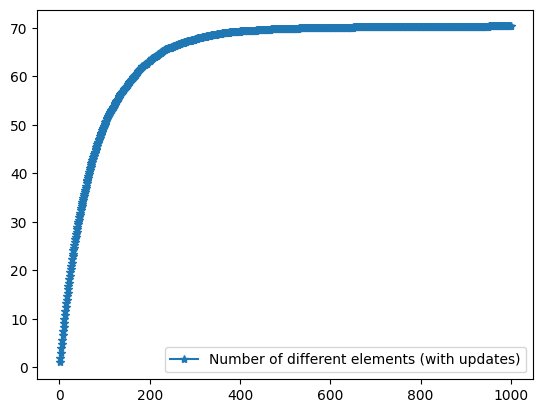

In [42]:
n, k  = 100, 1000
update_const = 15

collector_with_updates = run_experiment_with_updates(100, n, k, update_const)
plt.plot(range(1, k + 1), collector_with_updates, "*-", label="Number of different elements (with updates)")
plt.legend()